<a href="https://colab.research.google.com/github/thepankaj018/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - CREDIT CARD DEFAULT PREDICTION



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

The project aims to predict the likelihood of credit card holders defaulting on their next month's payment using the "Default of Credit Card Clients Dataset".This dataset includes information on 30,000 credit card clients in Taiwan from April 2005 to September 2005, and includes attributes such as demographic factors, credit data, and history of payment.

The first step in the project is to perform exploratory data analysis (EDA) on the dataset. This includes analyzing the distribution of the data, identifying any missing or duplicate values, and understanding the relationship between different variables. The EDA also includes visualization of the data to gain insights about the distribution of the data and to identify any patterns or outliers in the data.

Once the EDA is complete, the next step is to pre-process the data. This includes cleaning the data, handling missing values, and transforming the data so that it can be used for machine learning models. The data is also split into training and testing datasets to be used for model training and evaluation.

The next step is to select the appropriate machine learning model for the problem. This includes comparing the performance of different models, such as logistic regression, decision tree, and random forest, and selecting the model with the highest accuracy. The model is then trained on the training dataset and evaluated on the testing dataset.

After the model is trained and evaluated, the final step is to interpret the results and make recommendations. This includes analyzing the model's performance, interpreting the model's coefficients, and understanding the feature importance. Based on the analysis, recommendations are made for how the model can be used to improve the credit card default prediction process.

In conclusion, the Credit Card Default Prediction project is a crucial step in the credit card industry as it helps financial institutions to identify the likelihood of a credit card holder defaulting on their payments. This project is a combination of Exploratory Data Analysis, Data pre-processing, Model Selection, Training and Evaluation. The model developed in this project can help financial institutions to take appropriate action to prevent defaults and minimize loss. The project provides a comprehensive understanding of the credit card holder's behavior and helps in creating better strategies for the industry.




# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)

### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
file_path = '/content/drive/MyDrive/default of credit card clients.xls - Data.csv'
df = pd.read_csv(file_path,header = 1)


### Dataset First View

In [6]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'Nunber of rows are {df.shape[0]}')
print(f'Number of columns are {df.shape[1]}')

Nunber of rows are 30000
Number of columns are 25


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f'number of duplicates values are {df.duplicated().sum()}')

number of duplicates values are 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

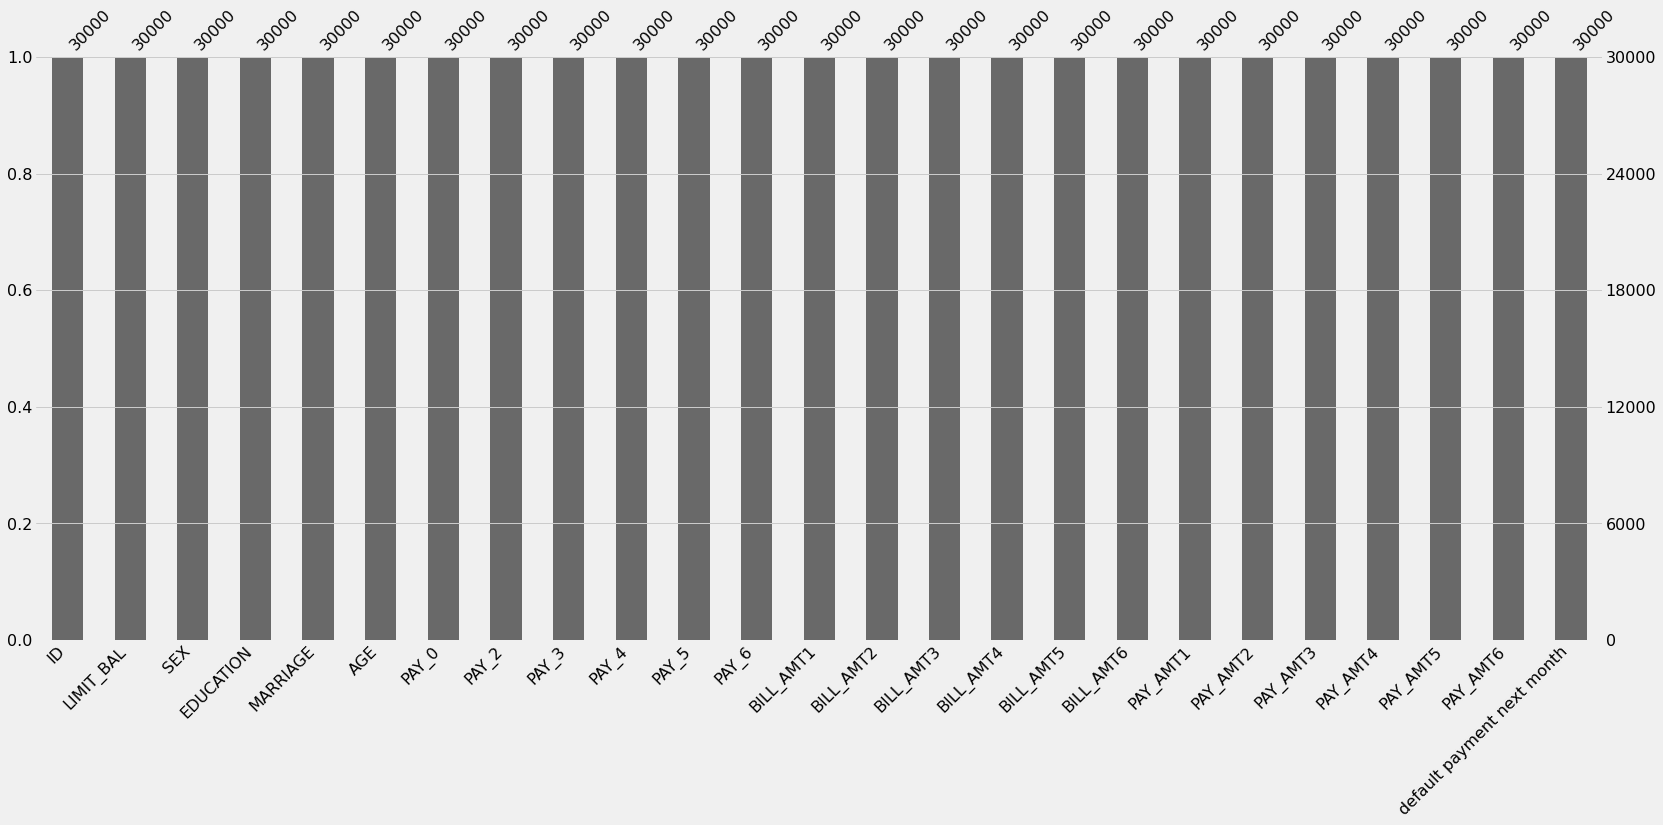

In [11]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)
plt.show()

### What did you know about your dataset?

1) There are 30000 rows and 25 columns present in dataset.

2) Datatypes of variables present in datasets are integer.

3) There is no duplicate entries in the dataset.

4) There is no missing values present in the datasets.


## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe().T.style.background_gradient(cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
ID,30000.000000,15000.500000,8660.398374,1.000000,7500.750000,15000.500000,22500.250000,30000.000000
LIMIT_BAL,30000.000000,167484.322667,129747.661567,10000.000000,50000.000000,140000.000000,240000.000000,1000000.000000
SEX,30000.000000,1.603733,0.489129,1.000000,1.000000,2.000000,2.000000,2.000000
EDUCATION,30000.000000,1.853133,0.790349,0.000000,1.000000,2.000000,2.000000,6.000000
MARRIAGE,30000.000000,1.551867,0.521970,0.000000,1.000000,2.000000,2.000000,3.000000
AGE,30000.000000,35.485500,9.217904,21.000000,28.000000,34.000000,41.000000,79.000000
PAY_0,30000.000000,-0.016700,1.123802,-2.000000,-1.000000,0.000000,0.000000,8.000000
PAY_2,30000.000000,-0.133767,1.197186,-2.000000,-1.000000,0.000000,0.000000,8.000000
PAY_3,30000.000000,-0.166200,1.196868,-2.000000,-1.000000,0.000000,0.000000,8.000000
PAY_4,30000.000000,-0.220667,1.169139,-2.000000,-1.000000,0.000000,0.000000,8.000000


### Variables Description 

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 0,4,5,6 = Unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others,0=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default payment next month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [14]:
columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default payment next month']

In [15]:
# Check Unique Values for each variable.
for elem in columns:
  print("-"*100)
  print(" ")
  print(f'Unique values present in {elem} are')
  print(" ")
  print(df[elem].unique())
  print(" ")
  print("*"*100)

----------------------------------------------------------------------------------------------------
 
Unique values present in LIMIT_BAL are
 
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
 
****************************************************************************************************
-----------------------------------------------------------------------------------------------

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

In [17]:
# convert column names to lowercase
df.columns = map(str.lower, df.columns)

In [18]:
# Renaming columns
df.rename(columns={'pay_0': 'pay_sept','pay_2': 'pay_aug','pay_3': 'pay_jul',
                   'pay_4': 'pay_jun','pay_5': 'pay_may','pay_6': 'pay_apr'},inplace=True)

df.rename(columns={'bill_amt1': 'bill_amt_sept','bill_amt2': 'bill_amt_aug','bill_amt3': 'bill_amt_jul',
                   'bill_amt4': 'bill_amt_jun','bill_amt5': 'bill_amt_may','bill_amt6': 'bill_amt_apr'}, inplace = True)

df.rename(columns={'pay_amt1': 'pay_amt_sept','pay_amt2': 'pay_amt_aug','pay_amt3': 'pay_amt_jul',
                   'pay_amt4': 'pay_amt_jun','pay_amt5': 'pay_amt_may','pay_amt6': 'pay_amt_apr'},inplace=True)

In [19]:
# Droping the column "ID"
df.drop(columns = ["id"],inplace = True)

In [20]:
# Renaming column 'default payment next month'
df.rename(columns = {'default payment next month':'isdefaulter'},inplace = True)

In [21]:
# Fetching continous variable
continous_variable = ['limit_bal', 'bill_amt1', 'bill_amt2', 'bill_amt3', 
                      'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 
                      'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [22]:
# Checking number of continous variable
len(continous_variable)

13

In [23]:
# Fetching discrete variable
discrete_variable = ['sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [24]:
# Checking number of discrete variables
len(discrete_variable)

10

In [25]:
# Making a copy of original dataframe
data = df.copy()

In [26]:
# Applying value count on "EDUCATION"
data['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [27]:
# Replacing numerical categories available in "education" with well known categories .
data['education']= data['education'].replace([[0,4,5,6],1,2,3],value = ['Unknown','Graduate School','University','High School'])

In [28]:
# Again applying value counts on "EDUCATION"
data['education'].value_counts()

University         14030
Graduate School    10585
High School         4917
Unknown              468
Name: education, dtype: int64

In [29]:
# Applying value counts on 'MARRIAGE'
data['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [30]:
# Replacing numerical categories available in "marriage" with well known categories 
data['marriage'] = data['marriage'].replace([[0,3],1,2],['Others','Married','Single'])

In [31]:
# Again Applying value counts on 'marriage'
data['marriage'].value_counts()

Single     15964
Married    13659
Others       377
Name: marriage, dtype: int64

In [32]:
# Replacing numerical categories available in "sex" with well known categories 
data['sex'] = data['sex'].replace([1,2],['Male','Female'])

In [33]:
# # Replacing numerical categories available in "Isdefaulter" with well known categories
data['isdefaulter'] = data['isdefaulter'].replace([0,1],['No','Yes'])

### What all manipulations have you done and insights you found?

* Converted the column name from upercase to lowercase.
* Rename the column name that sounds more meaningful.
* Separated continous and discrete variables.
* Categories available inside a column is changed to meaningful names.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**UNIVARIATE ANALYSIS**

#### Chart - 1

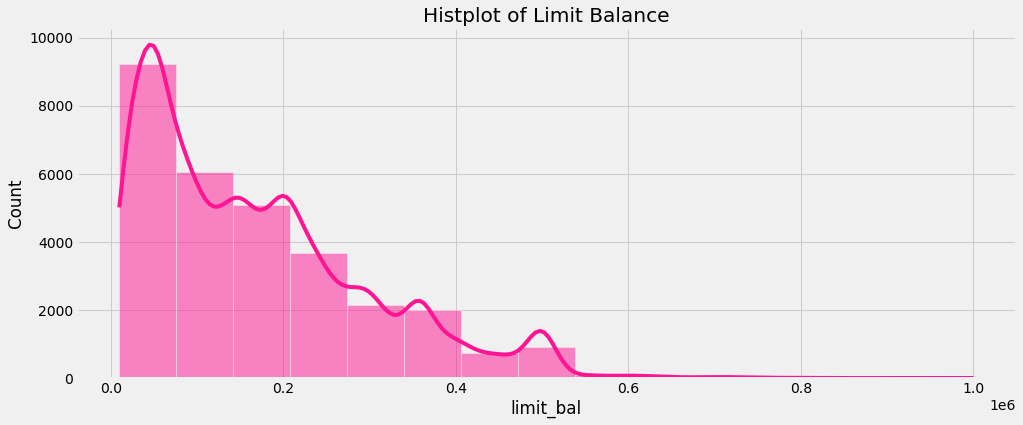

 
Skewness of data is 0.992866960519544


In [34]:
# Chart - 1 visualization code
plt.figure(figsize = (15,6))
sns.histplot(data = df,x = 'limit_bal',kde = True,color = 'deeppink',bins = 15)
plt.title('Histplot of Limit Balance')
plt.show()

print(" ")
skewness = df['limit_bal'].skew()
print(f'Skewness of data is {skewness}')

##### 1. Why did you pick the specific chart?

I have used Histplot because it is a powerful tool for understanding the distribution of a variable by showing the frequency of different values.It also hepls to understand the central tendency of the data and whether the data is skewed or symmetric.

##### 2. What is/are the insight(s) found from the chart?

A skewness value of 0.9928 suggests that the data is highly skewed, meaning that most of the data is concentrated on one side of the distribution.There are extreme values or outliers in the data that are pulling the mean in one direction.Also data has a long tail in one direction, which could indicate that there are a few very large value that are distorting the overall distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A histogram of "limit_bal" can show the overall distribution of credit amounts, which can help to identify patterns and trends in how credit is being used.A skewness value of 0.9928 suggests that the data is highly skewed, meaning that most of the data is concentrated on one side of the distribution, it could indicate that the issuer is giving out a lot of credit to a small number of customers, which could be an indication of a higher risk of default. This could be an indication that the issuer should be more cautious when approving credit to certain customers.

#### Chart - 2

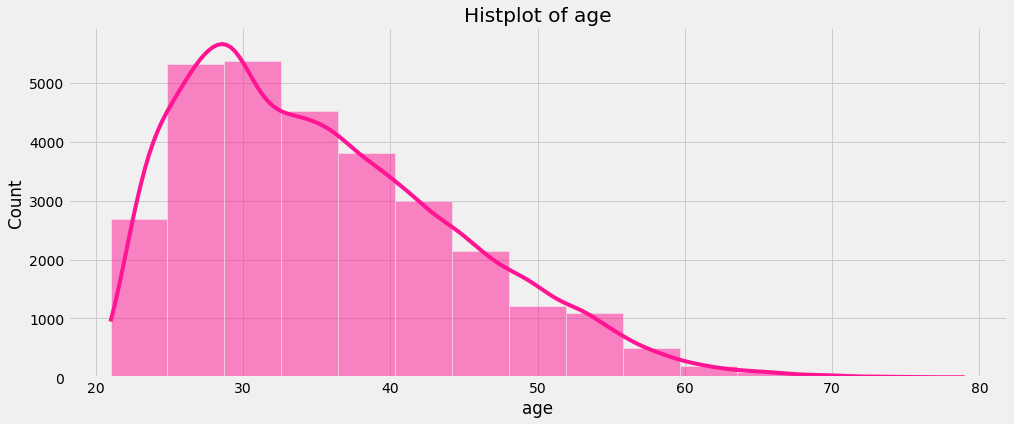

 
Skewness of data is 0.7322458687830562


In [35]:
# Chart - 2 visualization code
plt.figure(figsize = (15,6))
sns.histplot(data = df,x = 'age',kde = True,color = 'deeppink',bins = 15)
plt.title('Histplot of age')
plt.show()

print(" ")
skewness = df['age'].skew()
print(f'Skewness of data is {skewness}')

##### 2. What is/are the insight(s) found from the chart?

A skewness value of 0.7322 suggests that the data is moderately skewed, meaning that the data is concentrated on one side of the distribution. It could indicate that the issuer is giving out credit to a specific age group, which could be an indication of a higher risk of default. This could be an indication that the issuer should be more cautious when approving credit to certain age groups.

#### Chart - 3

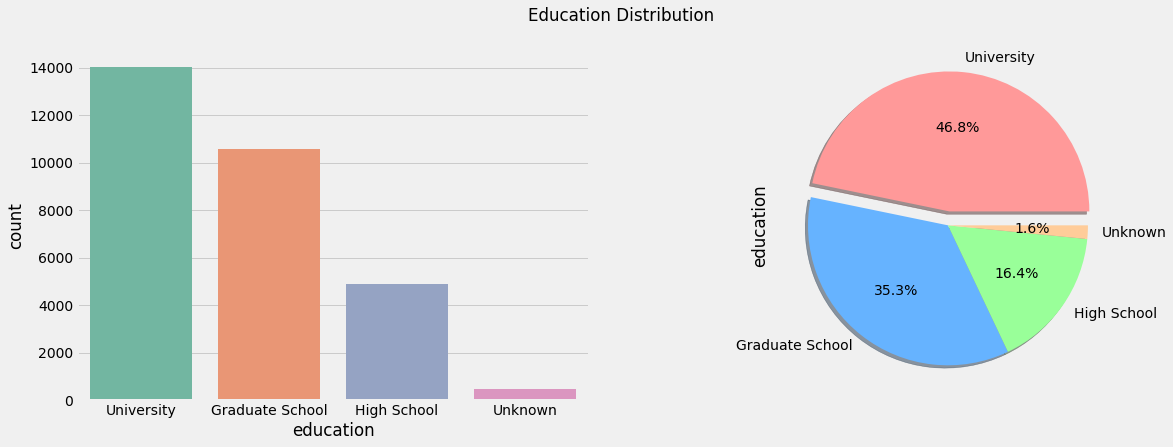

In [36]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Use seaborn to create a countplot on the left subplot
sns.countplot(data=data, x='education', ax=ax[0],palette='Set2')

# Use matplotlib to create a pie chart on the right subplot
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data['education'].value_counts().plot.pie(colors = colors,autopct='%1.1f%%', shadow=True, 
                                    explode = (0.1, 0,0,0))

# Add a title to the figure
fig.suptitle('Education Distribution')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I have used countplot and pie chart because Countplot is used to show the frequency of each category in the variable, while pie chart is used to show the proportion of each category in the variable.

##### 2. What is/are the insight(s) found from the chart?

People who went to university are more in number around 47% followed by graduate schoool which is around 35% and high school which is around 17% .  Majority of people are well educated which is clearly observed by the above visualization.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights on the education distribution can help create a positive business impact by allowing the credit card company to better target and understand their customer base. For example, the credit card company may want to focus on marketing campaigns towards university graduates, as they make up the largest portion of their customer base.Additionally, by understanding the education distribution, the credit card company may be able to create different credit card products or services tailored to specific education levels.The credit card company may also consider the fact that people with lower education levels are more likely to default on their credit card payments, which could be a negative impact on the business.

#### Chart - 4

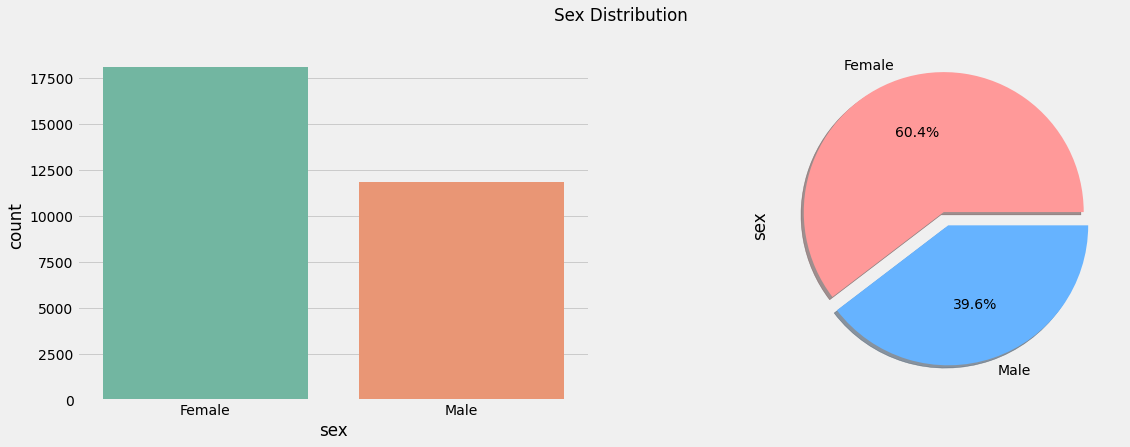

In [37]:
# Chart - 4 visualization code
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Use seaborn to create a countplot on the left subplot
sns.countplot(data=data, x='sex', ax=ax[0],palette='Set2')

# Use matplotlib to create a pie chart on the right subplot
colors = ['#ff9999','#66b3ff']
data['sex'].value_counts().plot.pie(colors = colors,autopct='%1.1f%%', shadow=True, 
                                    explode = (0.1, 0))

# Add a title to the figure
fig.suptitle('Sex Distribution')

# Show the plot
plt.show()


##### 2. What is/are the insight(s) found from the chart?

The number of female are more in number compared to male.Female contribute towards 60.4% of dataset while male contribute towards 39.6% of datasets.

#### Chart - 5

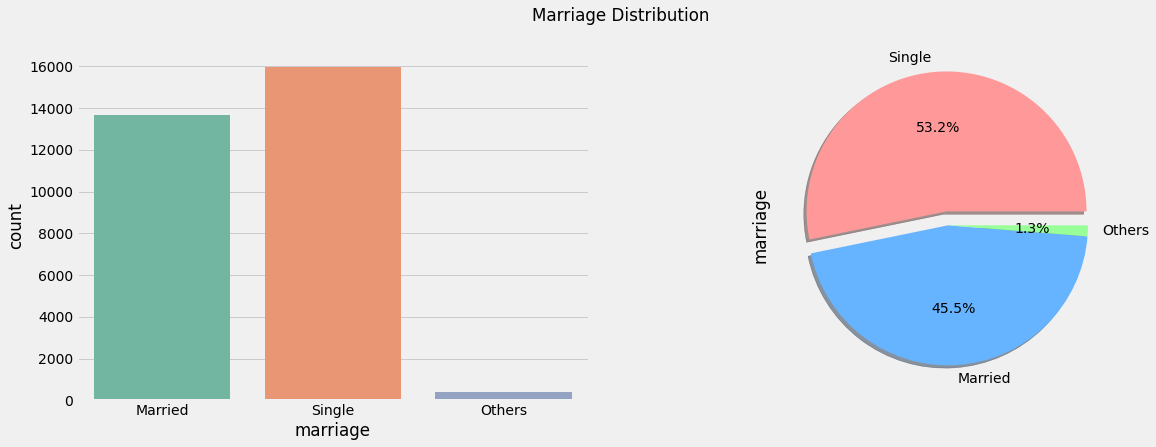

In [38]:
# Chart - 5 visualization code
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Use seaborn to create a countplot on the left subplot
sns.countplot(data=data, x='marriage', ax=ax[0],palette='Set2')

# Use matplotlib to create a pie chart on the right subplot
colors = ['#ff9999','#66b3ff','#99ff99']
data['marriage'].value_counts().plot.pie(colors = colors,autopct='%1.1f%%', shadow=True, 
                                    explode = (0.1, 0,0))

# Add a title to the figure
fig.suptitle('Marriage Distribution')

# Show the plot
plt.show()


##### 2. What is/are the insight(s) found from the chart?

Person who is single is slightly more than the married.Single contribute 53% of dataset while married contribute 45% of dataset .

#### Chart - 6

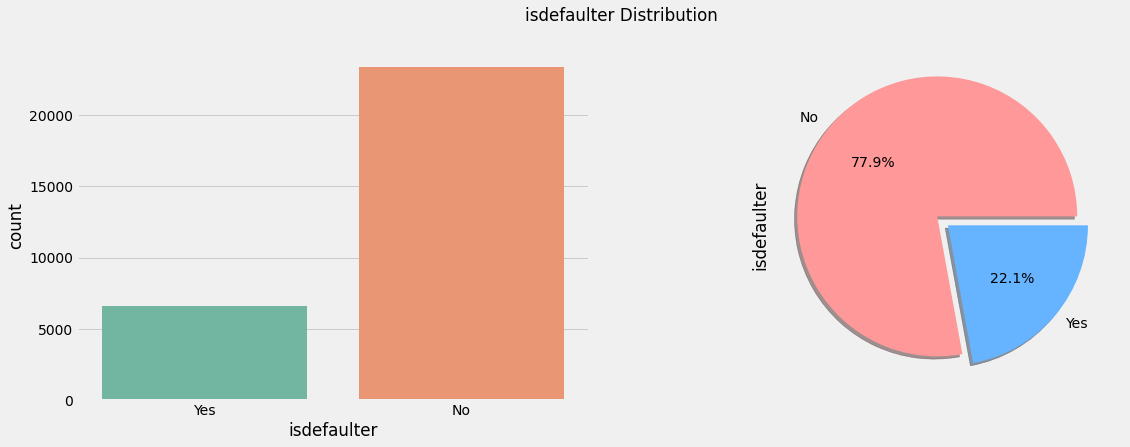

In [39]:
# Chart - 6 visualization code
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Use seaborn to create a countplot on the left subplot
sns.countplot(data=data, x='isdefaulter', ax=ax[0],palette='Set2')

# Use matplotlib to create a pie chart on the right subplot
colors = ['#ff9999','#66b3ff']
data['isdefaulter'].value_counts().plot.pie(colors = colors,autopct='%1.1f%%', shadow=True, 
                                    explode = (0.1, 0))

# Add a title to the figure
fig.suptitle('isdefaulter Distribution')

# Show the plot
plt.show()


##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that the percentage of defaulted credit card holders is significantly lower than the percentage of non-defaulted credit card holders. This indicates that the majority of credit card holders are able to make their payments on time and do not default on their credit card debts. Additionally, this could also suggest that the credit card company's policies and practices are effective in mitigating the risk of default among its customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that 78% of individuals in the dataset did not default on their credit card payments and only 22% did default can be used to create a positive business impact. This information can be used by financial institutions to assess the creditworthiness of potential borrowers and make informed lending decisions. This can help them avoid potential losses from defaults and potentially increase their profits.

###BIVARIATE ANALYSIS

#### Chart - 7

**SEX VS DEFAULTER**

In [40]:
def gen_df(column_name1, column_name2):
    # Create a temporary dataframe with the value counts of column_name1
    temp_df1 = data[column_name1].value_counts().reset_index().rename(columns={'index': column_name1, column_name1: 'counts'})
    
    # Create a temporary dataframe with the number of defaulters for each unique combination of column_name1 and column_name2
    temp_df2 = data.groupby([column_name1, column_name2]).size().reset_index().rename(columns={0:'defaulter_count'})

    # Filter the dataframe to only include rows where column_name2 is 'Yes'
    temp_df2 = temp_df2[temp_df2[column_name2]=='Yes'][[column_name1,'defaulter_count']]

    # Merge the two temporary dataframes on column_name1
    temp_df = pd.merge(temp_df1, temp_df2, how='inner', on=column_name1)

    # Calculate the percentage of defaulters for each unique value in column_name1
    temp_df['% defaulter'] = temp_df['defaulter_count']*100/temp_df['counts']

    return temp_df




In [41]:
sex_wise_default = gen_df('sex','isdefaulter')
sex_wise_default

,sex,counts,defaulter_count,% defaulter
0,Female,18112,3763,20.776281
1,Male,11888,2873,24.167227


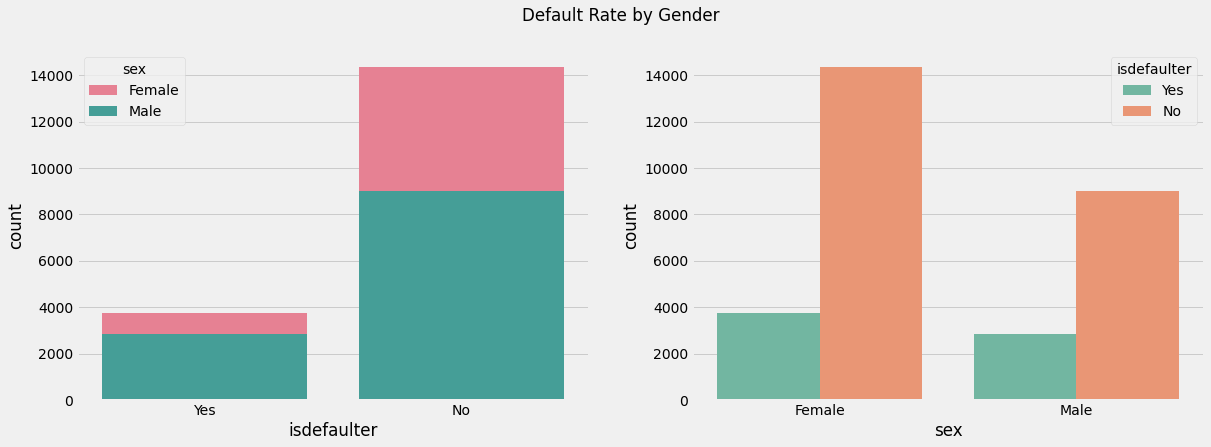

In [42]:
# Chart - 7 visualization code
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='isdefaulter', hue='sex', data=data, dodge=False,ax = ax[0],palette = 'husl')

sns.countplot(x = 'sex',hue = 'isdefaulter',data = data,ax = ax[1],palette = 'Set2')


# Add a title to the figure
fig.suptitle('Default Rate by Gender')

# show the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Out of total female 21 percent females are found to be defaulter and out of total males 24 percent males are defaulter.The chances of male being a defaulter is slightly more than the female.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that a slightly higher percentage of males are defaulters compared to females can potentially have a positive impact on the business. This information can help the business target specific demographics in their marketing or risk management strategies. For example, if a company is targeting males in their marketing campaigns, they may want to focus on messages that stress the importance of financial responsibility and the potential consequences of defaulting on loans.

Additionally, the insight does not lead to negative growth in itself. But, it could lead to negative perception if the business uses it to discriminate or stereotype its clients based on their gender. It should be used as a piece of information among others, and not as the only factor in decision making.






#### Chart - 8

**EDUCATION VS DEFAULTER**

In [43]:
edu_wise_default = gen_df('education','isdefaulter')
edu_wise_default

,education,counts,defaulter_count,% defaulter
0,University,14030,3330,23.734854
1,Graduate School,10585,2036,19.234766
2,High School,4917,1237,25.157616
3,Unknown,468,33,7.051282


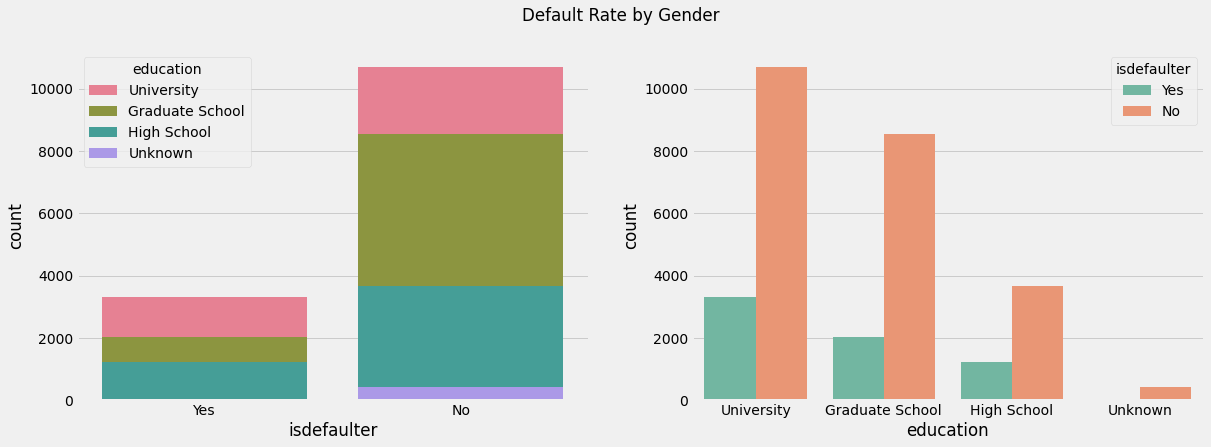

In [44]:
# Chart - 8 visualization code
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='isdefaulter', hue='education', data=data, dodge=False,ax = ax[0],palette = 'husl')

sns.countplot(x ='education',hue = 'isdefaulter',data = data,ax = ax[1],palette = 'Set2')

# Add a title to the figure
fig.suptitle('Default Rate by Gender')

# show the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Around 25 percent of people who attended uptp high school was found to be defaulter while 23 percent of people who attended upto university was found to be defaulter followed by graduate school which is around 19 percent .

#### Chart - 9

**MARRIAGE VS DEFAULTER**

In [45]:
marriage_wise_default = gen_df('marriage','isdefaulter')
marriage_wise_default

,marriage,counts,defaulter_count,% defaulter
0,Single,15964,3341,20.928339
1,Married,13659,3206,23.471704
2,Others,377,89,23.607427


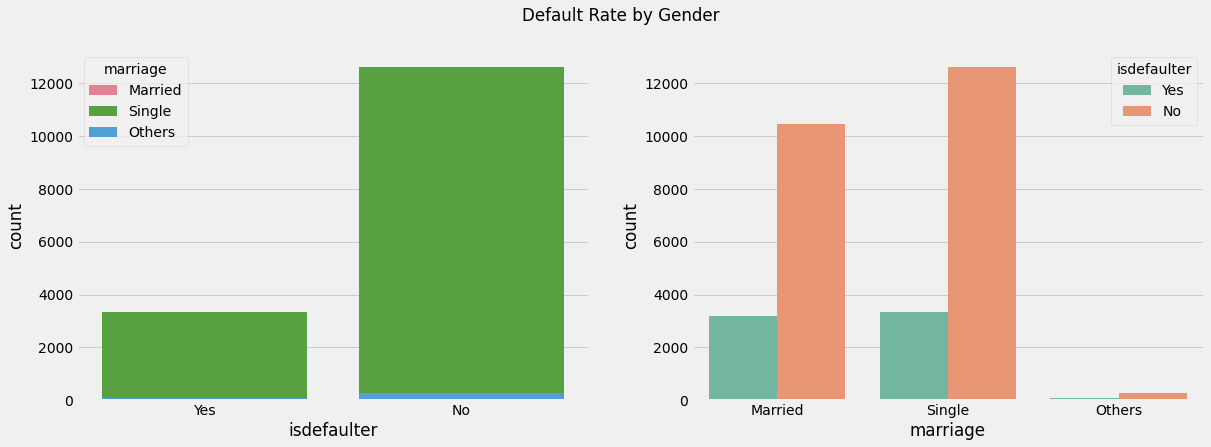

In [46]:
# Chart - 9 visualization code
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='isdefaulter', hue='marriage', data=data, dodge=False,ax = ax[0],palette = 'husl')

sns.countplot(x ='marriage',hue = 'isdefaulter',data = data,ax = ax[1],palette = 'Set2')

# Add a title to the figure
fig.suptitle('Default Rate by Gender')

# show the plot
plt.show()


##### 2. What is/are the insight(s) found from the chart?

Married person have slightly higher chance of being defaulter in comparision with single person .Maried person had default rate of 24 percent while single person had default rate of 21 percent.

#### Chart - 10

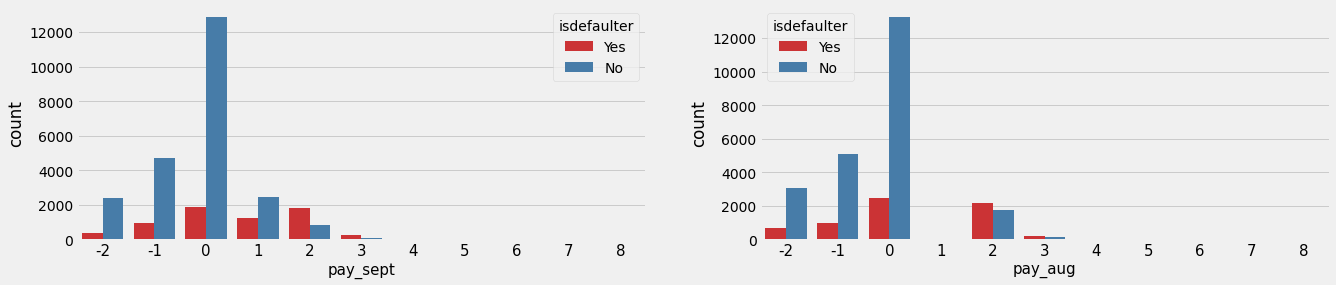

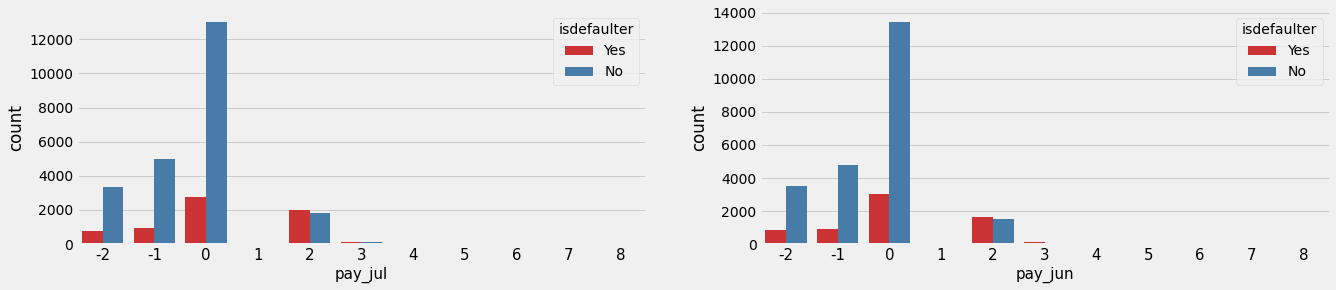

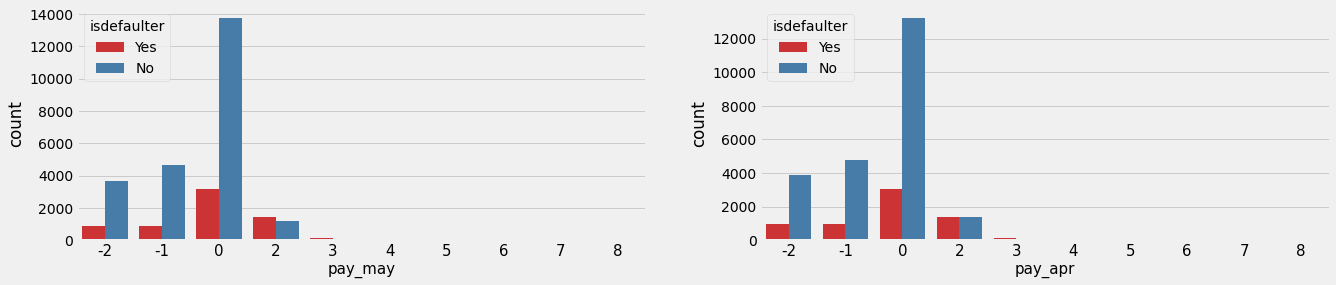

In [103]:
# Chart - 10 visualization code
repaymnt_col = ['pay_sept','pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr']
i = 0
while i<6:
  fig = plt.figure(figsize = [20,4])
  plt.subplot(1,2,1)                         
  sns.countplot(x = repaymnt_col[i], data=data,hue = 'isdefaulter' ,palette='Set1') 
  plt.xticks(fontsize=15)
  plt.xlabel(repaymnt_col[i],fontsize=15)
  i += 1
    
  plt.subplot(1,2,2)
  sns.countplot(x = repaymnt_col[i], data=data,hue = 'isdefaulter' ,palette= 'Set1') 
  plt.xticks(fontsize=15)
  plt.xlabel(repaymnt_col[i],fontsize=15)
  i += 1
    
  if i==6:
      break
   
  plt.show() 



##### 2. What is/are the insight(s) found from the chart?

Based on the analysis of the data, it appears that there is a correlation between timely credit card bill payments and lower likelihood of default. The number of individuals who make their payments on time and are still considered as defaulters appears to be small. Additionally, as the delay in payments increases, the likelihood of default also seems to increase. This suggests that prompt payment of credit card bills can be an indicator of good financial stability and a lower risk of default.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the data can potentially have a positive impact on the business. Understanding the relationship between payment delays and default can help the business to identify and target high-risk customers, which can result in improved risk management and reduced financial losses.

#### Chart - 11

**LIMIT BAL VS DEFAULT**

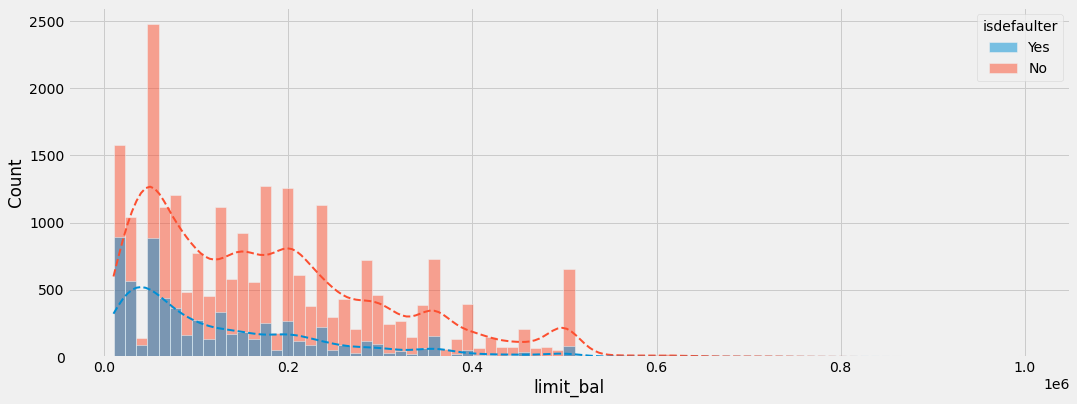

In [49]:
# Chart - 11 visualization code
plt.figure(figsize = (16,6))
sns.histplot(data = data, x='limit_bal', hue='isdefaulter', 
             kde=True, line_kws={'ls':'--', 'lw':2})
plt.show()

##### 1. Why did you pick the specific chart?

By plotting the histogram and the KDE plot with a hue parameter of 'isdefaulter', it is possible to visualize the differences in the distribution of 'limit_bal' between the two groups of defaulters and non-defaulters.

##### 2. What is/are the insight(s) found from the chart?

Based on the plot of 'limit_bal' and 'isdefaulter', it appears that there is a correlation between credit limit and default status. Individuals with lower credit limits appear to be more likely to default on their payments, while those with higher credit limits are less likely to default. This suggests that credit limit may be a factor in determining the likelihood of default, although other factors should also be considered.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the plot of 'limit_bal' and 'isdefaulter' may help create a positive business impact by allowing credit providers to identify high-risk individuals and take necessary measures to mitigate their risk. For example, credit providers may choose to offer higher credit limits to individuals who have a lower risk of default.

However, there could also be negative impacts associated with these insights. For example, using credit limit as a determining factor for loan approval may result in discrimination against individuals with lower credit limits, which could be perceived as unfair and lead to negative brand reputation

#### Chart - 12

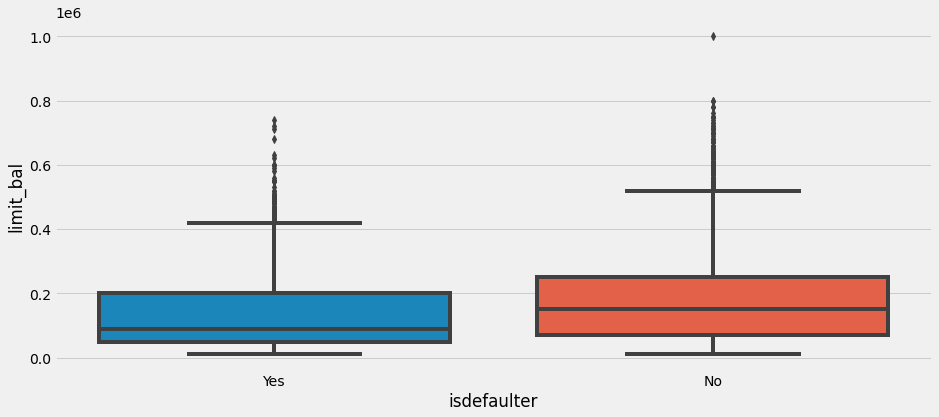

In [50]:
# Chart - 12 visualization code
plt.figure(figsize = (14,6))
sns.boxplot(data = data, x='isdefaulter', y='limit_bal')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

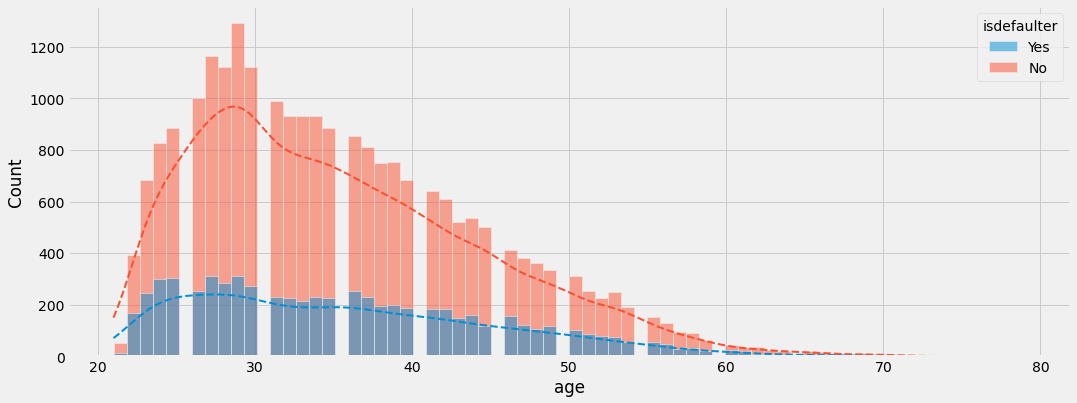

In [51]:
# Chart - 13 visualization code
plt.figure(figsize = (16,6))
sns.histplot(data = data, x='age', hue='isdefaulter', 
             kde=True, line_kws={'ls':'--', 'lw':2})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

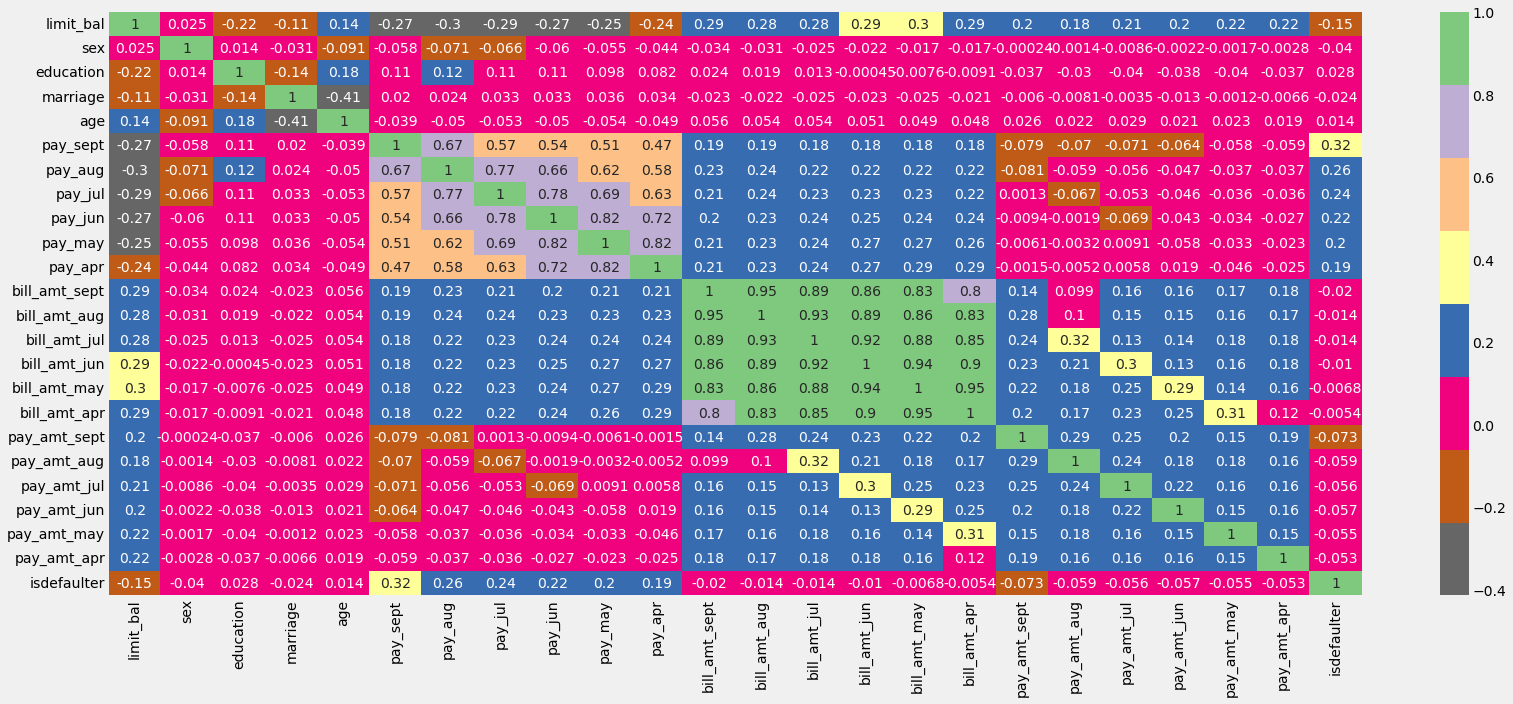

In [52]:
# Correlation Heatmap visualization code
corr=df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

###Chart - 15

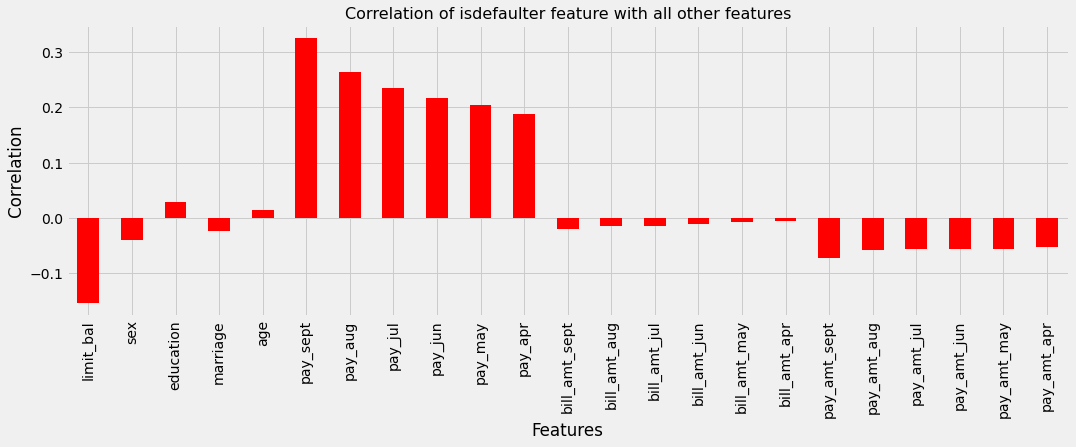

In [53]:
# Create a new figure with specified size
plt.figure(figsize = (16,5))

# Plot a bar chart of the correlation values of the "isdefaulter" feature with all other features, using the data from the corr dataframe
corr.iloc[:-1, -1].plot.bar(color='red')

plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation of isdefaulter feature with all other features", fontdict={'size':16})
plt.show()

###Chart - 16

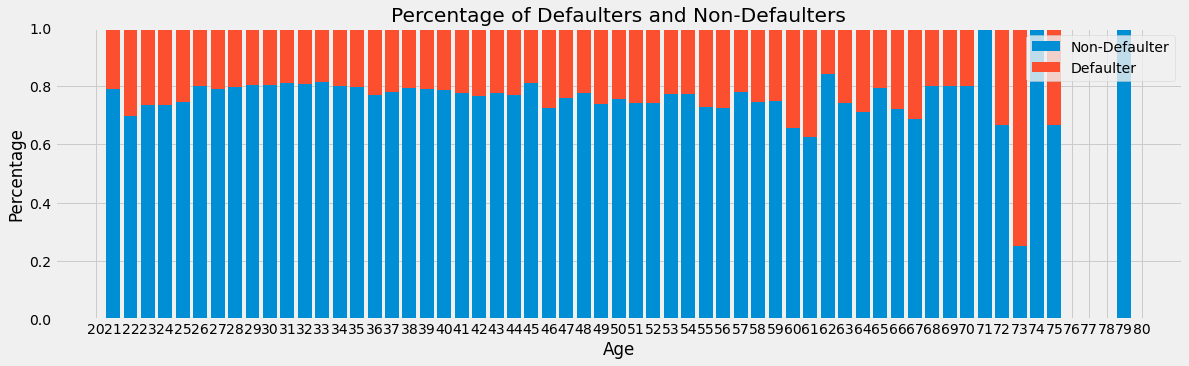

In [54]:
# Creating a crosstab table using the "age" column as the rows and the "isdefaulter" column as the columns, normalizing by row
age_df = pd.crosstab(data.age, data.isdefaulter, normalize='index')

# Creating a new figure with specified size
plt.figure(figsize = (18,5))

# Creating a bar chart of non-defaulters
plt.bar(x=age_df.index, height=age_df.No, label='Non-Defaulter')

# Creating a bar chart of defaulters on top of non-defaulters
plt.bar(x=age_df.index, height=age_df.Yes, bottom=age_df.No, label='Defaulter')

# Set x-axis tick marks
plt.xticks(ticks=range(20,81))
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.title("Percentage of Defaulters and Non-Defaulters")
plt.legend()
plt.show()


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [58]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [59]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [60]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [61]:
# Expand Contraction

#### 2. Lower Casing

In [62]:
# Lower Casing

#### 3. Removing Punctuations

In [63]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [64]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [65]:
# Remove Stopwords

In [66]:
# Remove White spaces

#### 6. Rephrase Text

In [67]:
# Rephrase Text

#### 7. Tokenization

In [68]:
# Tokenization

#### 8. Text Normalization

In [69]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [70]:
# POS Taging

#### 10. Text Vectorization

In [71]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [72]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [73]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [74]:
# Transform Your data

### 6. Data Scaling

In [75]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [76]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [77]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [78]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [79]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [84]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [87]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [88]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***